<a href="https://colab.research.google.com/github/FebryanRizki24/quiz-2-machine-learning/blob/main/TI3F_FebryanRH_Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Febryan Rizki Hidayatullah
# Nim : 2141720059
# Kelas : 3F-TI

# **Kuis 2 - Optical Character Recognition Convolutional Neural Network**
---
###### Reference: https://colab.research.google.com/drive/1JIKahhAQL9fUIDDU4cQxQyk29LiyPGqU?usp=sharing

## Detail Kuis

1. Gunakan source code pada link colab diatas.
2. Implementasikan setiap bagiannya dengan menggunakan dataset dan file pendukung jpeg berikut.
3. Tambahkan penjelasan pada setiap bagian yang Anda implementasikan. Jelaskan konsep dan langkah-langkah yang Anda lakukan.
4. Berikan analisis singkat mengenai hasil yang Anda peroleh setelah melatih model.


# Import Library

In [ ]:
import tensorflow as tf # untuk melakukan tugas-tugas deep learning seperti pembuatan dan pelatihan model neural networks.
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Pustaka lain untuk visualisasi data
from sklearn.preprocessing import LabelBinarizer  # Untuk encoding label
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set train dan test
from sklearn.metrics import classification_report  # Untuk evaluasi performa model
import zipfile  # Untuk bekerja dengan file-file zip

# Load Dataset

## Load MNIST

In [ ]:
from tensorflow.keras.datasets import mnist # Import dataset MNIST from TensorFlow Keras yang berisi sekumpulan gambar angka tulisan tangan dan label yang sesuai.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data() # Memuat data pelatihan dan data uji dari dataset MNIST

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Check shape data
(train_data.shape, test_data.shape) # Menampilkan bentuk (shape) dari data pelatihan dan data uji

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Check shape labels
(train_labels.shape, test_labels.shape) # Menampilkan bentuk (shape) dari label data pelatihan dan label data uji

((60000,), (10000,))

In [ ]:
# Check each data shape --> should be 28*28
train_data[0].shape # Menampilkan bentuk (shape) dari gambar pertama dalam data pelatihan

(28, 28)

In [ ]:
# Check the label
train_labels.shape # Menampilkan bentuk (shape) dari label data pelatihan

(60000,)

### Combine Train and Test Data

In [ ]:
digits_data = np.vstack([train_data, test_data]) # Menggabungkan data pelatihan dan data uji secara vertikal
digits_labels = np.hstack([train_labels, test_labels]) # Menggabungkan label data pelatihan dan data uji secara horizontal

In [ ]:
# Check data shape
digits_data.shape # Menampilkan bentuk (shape) dari gabungan data pelatihan dan data uji

(70000, 28, 28)

In [ ]:
# Check label shape
digits_labels.shape # Menampilkan bentuk (shape) dari label gabungan data pelatihan dan data uji

(70000,)

Text(0.5, 1.0, 'Class: 9')

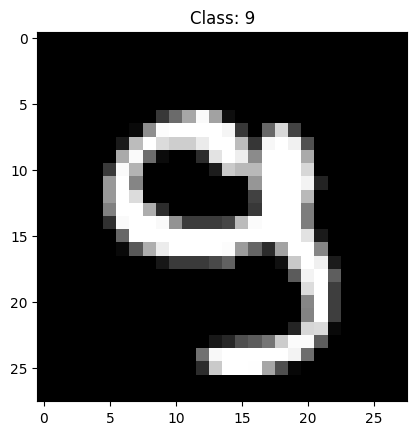

In [ ]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0]) # Memilih indeks acak dari data gabungan
plt.imshow(digits_data[idx], cmap='gray') # Menampilkan gambar dari data pada indeks yang dipilih
plt.title('Class: ' + str(digits_labels[idx])) # Menampilkan judul dengan label dari data pada indeks yang dipilih

<Axes: xlabel='Labels', ylabel='count'>

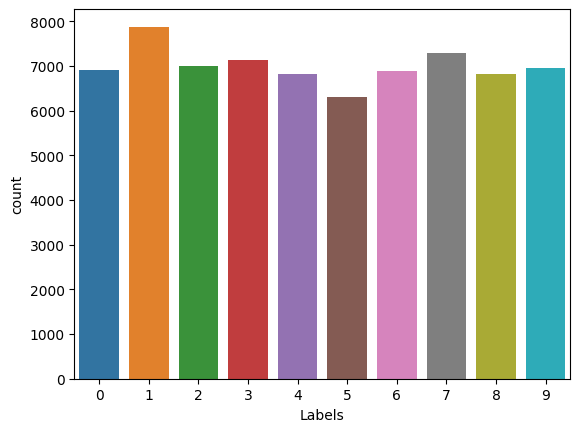

In [ ]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels']) # Membuat DataFrame Pandas dari label gabungan
sns.countplot(df_labels, x='Labels') # Menampilkan plot jumlah data untuk setiap label

## Load Kaggle A-Z

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip # Download file dari internet menggunakan terminal

--2023-12-05 10:17:54--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   127MB/s    in 1.5s    

2023-12-05 10:17:55 (127 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # Membuka file zip dengan mode hanya baca ('r')
zip_object.extractall('./') # Mengekstrak semua isi file zip ke direktori saat ini ('./')
zip_object.close() # Menutup objek file zip setelah selesai

In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') # Membaca file CSV 'A_Z Handwritten Data.csv' sebagai DataFrame Pandas dengan tipe data float32
dataset_az # Menampilkan DataFrame 'dataset_az'

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1) # Menghapus kolom '0' dari dataset dan menyimpannya sebagai data gambar (features)
# Get labels only
alphabet_labels = dataset_az['0'] # Mengambil kolom '0' sebagai label untuk setiap data

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Check shape labels
alphabet_labels.shape # Menampilkan bentuk (shape) dari alphabet_data dan alphabet_labels

(372450,)

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28)) # Mengubah bentuk array data gambar menjadi (jumlah data, 28, 28)
# Check the result by its shape
alphabet_data.shape # Menampilkan bentuk (shape) baru dari alphabet_data setelah diubah bentuknya

(372450, 28, 28)

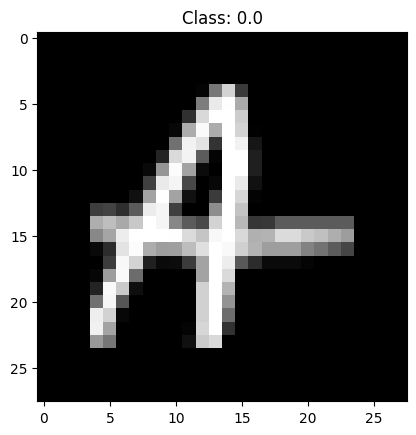

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0]) # Memilih indeks acak dari alphabet_data
plt.imshow(alphabet_data[index], cmap = 'gray') # Menampilkan gambar dari alphabet_data pada indeks yang dipilih
plt.title('Class: ' + str(alphabet_labels[index])); # Menampilkan judul dengan label dari alphabet_labels pada indeks yang dipilih

<Axes: xlabel='Labels', ylabel='count'>

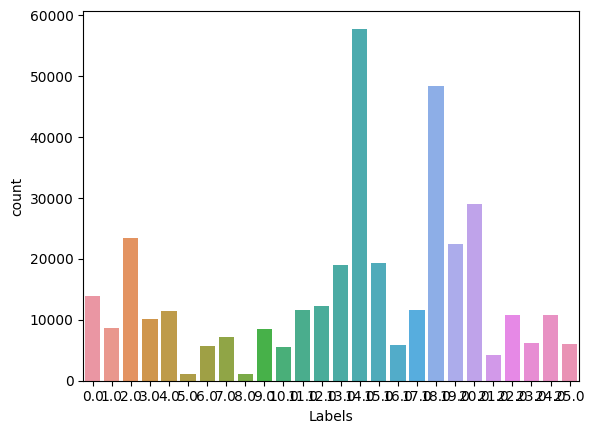

In [ ]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
}) # Membuat DataFrame Pandas dari label alfabet A-Z
sns.countplot(df_az_labels, x='Labels') # Menampilkan plot jumlah data untuk setiap label alfabet A-Z

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels) # Menampilkan nilai unik (unique) dari array digits_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels) # Menampilkan nilai unik (unique) dari array alphabet_labels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10 # Menambahkan 10 ke setiap value

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels) # Menampilkan nilai unik (unique) dari array alphabet_labels

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data]) # Menggabungkan data gambar dari alfabet dan digit secara vertikal
labels = np.hstack([alphabet_labels, digits_labels])  # Menggabungkan label dari alfabet dan digit secara horizontal

In [ ]:
# Check the shape
data.shape, labels.shape # Menampilkan bentuk (shape) dari data dan label yang telah digabungkan

((442450, 28, 28), (442450,))

In [ ]:
# Check labels
np.unique(labels) # Menampilkan nilai unik (unique) dari array labels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32') # Mengonversi data menjadi array NumPy dengan tipe data float32

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1) # Menambahkan dimensi baru pada akhir array data

# check shape
data.shape # Menampilkan ukuran dan dimensi data

(442450, 28, 28, 1)

# Preprocessing

In [ ]:
# Normalize data
data /= 255.0 # Nomalisasi data untuk menghasilkan nilai dari 0 sampai 1

In [ ]:
# Check range value of data
data[0].min(), data[0].max() # menemukan nilai minimum dan maksimum dalam gambar pertama dalam array data

(0.0, 1.0)

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer() # Membuat objek LabelBinarizer untuk mengonversi label menjadi bentuk biner
labels = le.fit_transform(labels) # Mengonversi label menjadi bentuk biner menggunakan fit_transform

In [ ]:
# Check labels shape
labels.shape # Menampikan ukuran dan dimensi labels

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

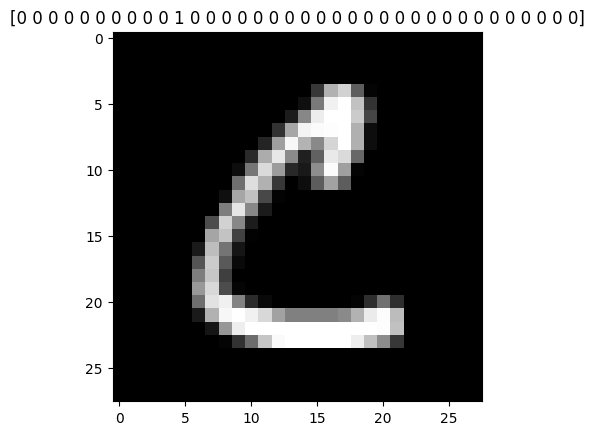

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray') # Menampilkan gambar dari data pada indeks 30000
plt.title(str(labels[0])) # Menampilkan label biner pertama sebagai judul gambar

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0) # Menghitung jumlah data untuk setiap label menggunakan sum(axis=0)
classes_total # Menampilkan jumlah data untuk setiap label

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max() # Menampilkan nilai maksimum dari jumlah data di antara semua label

57825

In [ ]:
# Create a weight for each data
classes_weights = {} # Membuat kamus kosong untuk menyimpan bobot untuk setiap kelas
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i] # Menghitung bobot untuk setiap kelas

# Check the weight for each data
classes_weights # Menampilkan bobot untuk setiap kelas

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels) # Membagi dataset dengan rasio data training 80% dan test 20%

## Create Data Augmentation

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Mengimpor ImageDataGenerator dari TensorFlow/Keras  untuk melakukan augmentasi data pada gambar secara real-time

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False) # Membuat augmentasi yang dapat mengenali gambar walaupun gambar tersebut mengalami rotasi, zoom, pergeseran baik horizontal maupun vertikal namun menonaktifkan flip secara horizontal

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential # Berguna dalam membuat model multilayer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense # Mengimport berbagai macam layer yang akan digunakan dalam Model CNN
from tensorflow.keras.callbacks import ModelCheckpoint # Membantu dalam menyimpan model secara berkala

In [ ]:
network = Sequential()  # Membuat model Sequential untuk membangun model secara berurutan

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Menambahkan layer Convolutional dengan 32 filter, masing-masing berukuran 3x3, dengan fungsi aktivasi ReLU.
# input_shape digunakan hanya pada layer pertama untuk memberi tahu model tentang bentuk inputnya.

network.add(MaxPool2D(pool_size=(2,2)))
# Menambahkan layer MaxPooling untuk mengurangi dimensi gambar dengan faktor 2 pada setiap dimensi.

network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
# Menambahkan layer Convolutional dengan 64 filter, masing-masing berukuran 3x3, dengan fungsi aktivasi ReLU.
# padding='same' digunakan untuk mempertahankan ukuran gambar yang sama setelah konvolusi.

network.add(MaxPool2D(pool_size=(2,2)))
# Menambahkan layer MaxPooling untuk mengurangi dimensi gambar dengan faktor 2 pada setiap dimensi.

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
# Menambahkan layer Convolutional dengan 128 filter, masing-masing berukuran 3x3, dengan fungsi aktivasi ReLU.
# padding='valid' akan membuat ukuran gambar lebih kecil setelah konvolusi.

network.add(MaxPool2D(pool_size=(2,2)))
# Menambahkan layer MaxPooling untuk mengurangi dimensi gambar dengan faktor 2 pada setiap dimensi.

network.add(Flatten())
# Menambahkan layer Flatten untuk mengubah data menjadi format 1D sebelum masuk ke layer Dense.

network.add(Dense(64, activation='relu'))
# Menambahkan layer Dense dengan 64 unit dan menggunakan fungsi aktivasi ReLU.

network.add(Dense(128, activation='relu'))
# Menambahkan layer Dense dengan 128 unit dan menggunakan fungsi aktivasi ReLU.

network.add(Dense(36, activation='softmax'))
# Menambahkan layer Dense dengan 36 unit (sesuai dengan jumlah kelas) dan menggunakan fungsi aktivasi Softmax.

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Mengkompilasi model dengan loss function 'categorical_crossentropy', optimizer 'adam', dan menggunakan metrik akurasi.

In [ ]:
# Check network summary
network.summary() # Menampilkan rincian model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Create actual labels
name_labels = '0123456789' # Menyimpan karakter angka 0-9 dalam variabel name_labels
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # Menambahkan karakter A-Z ke variabel name_labels
name_labels = [l for l in name_labels] # Mengonversi string name_labels menjadi daftar karakter terpisah

# Check actual label
print(name_labels) # Menampilkan label-label yang tersimpan dalam variabel name_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'  # Menyimpan nama file untuk menyimpan model setelah pelatihan
epochs = 20 # Jumlah epochs yang akan digunakan saat melatih model
batch_size = 128 # Ukuran batch yang akan digunakan saat melatih model

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True) # Membuat checkpoint untuk menyimpan model ketika val_loss (validation loss) menurun selama training dilakukan, variabel ini akan digunakan sebagai callbacks, dengan mencetak epoch, loss, dan metrik yang dipantau saat model disimpan.

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size), # Melatih model network dengan input berupa hasil augmentasi data train dan batch size serta menyimpannya dalam variabel history
                      validation_data = (X_test, y_test), # Mengukur kinerja berdasarkan validation data dari data test
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs, # menentukan berapa kali generator dipanggil dan training sebanyak epochs
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer]) # Menentukan bobot berbeda berdasarkan classes_weight, mencetak ringkasan training setelah setiap epoch dengan menggunakan checkpointer sebagai argumen callbacks

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.3083 - accuracy: 0.8190
Epoch 1: val_loss improved from inf to 0.22454, saving model to custom_ocr.model
2765/2765 [==============================] - 137s 45ms/step - loss: 2.3082 - accuracy: 0.8190 - val_loss: 0.2245 - val_accuracy: 0.9130
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9869 - accuracy: 0.9007
Epoch 2: val_loss did not improve from 0.22454
2765/2765 [==============================] - 123s 44ms/step - loss: 0.9869 - accuracy: 0.9007 - val_loss: 0.2552 - val_accuracy: 0.9009
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8235 - accuracy: 0.9132
Epoch 3: val_loss did not improve from 0.22454
2765/2765 [==============================] - 131s 47ms/step - loss: 0.8235 - accuracy: 0.9132 - val_loss: 0.2867 - val_accuracy: 0.8734
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7250 - accuracy: 0.9209
Epoch 4: val_loss did not

# Evaluate Model

## Make a Single Prediction

In [ ]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size) # Melakukan prediksi dengan menggunakan atribut X_test dan argument batch_size

692/692 [==============================] - 2s 3ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1] # menampilkan hasil prediksi index 1

array([1.6536495e-14, 2.4637676e-09, 1.5935826e-09, 1.5398373e-10,
       2.9080097e-13, 3.2633147e-09, 3.8199827e-14, 2.7738173e-08,
       8.3533907e-13, 1.6038303e-14, 6.4543631e-12, 7.7097044e-11,
       5.6854299e-11, 3.5313814e-08, 3.2069205e-11, 3.1539259e-12,
       2.4971250e-10, 6.9153611e-12, 9.9071372e-01, 9.2758620e-03,
       2.3647902e-13, 2.8477757e-08, 3.0432349e-13, 2.9313191e-14,
       5.7874341e-11, 1.4339260e-10, 1.7654041e-15, 7.5665384e-16,
       1.1757852e-09, 1.0289944e-05, 2.2861948e-10, 2.8410218e-15,
       2.1400457e-15, 4.5469665e-12, 4.4040696e-09, 5.3302052e-09],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1]) # Mengembalikan indeks dengan nilai maksimum dalam array prediksi ke-2

18

In [ ]:
# Check label for 24
name_labels[18]  # Mengembalikan label dari indeks ke-18 dalam list name_labels

'I'

In [ ]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[1]) # Mengembalikan label yang sebenarnya untuk data uji ke-2

18

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])] # Mengembalikan label dari indeks yang memiliki nilai maksimum dalam data uji ke-18

'S'

## Make an Evaluation on Test Data

In [ ]:
# Evaluate on test data
network.evaluate(X_test, y_test) # Melakukan evaluasi performa model pada set data uji

2766/2766 [==============================] - 8s 3ms/step - loss: 0.1545 - accuracy: 0.9509


[0.15454623103141785, 0.9509323239326477]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels)) # Mengevaluasi model untuk klasifikasi data berdasarkan nilai aktuan dan prediksi serta target_names berupa name_labels

              precision    recall  f1-score   support

           0       0.47      0.46      0.47      1381
           1       0.98      0.98      0.98      1575
           2       0.95      0.94      0.95      1398
           3       0.97      0.98      0.98      1428
           4       0.97      0.93      0.95      1365
           5       0.53      0.96      0.68      1263
           6       0.98      0.92      0.95      1375
           7       0.97      0.99      0.98      1459
           8       0.98      0.97      0.98      1365
           9       0.94      0.98      0.96      1392
           A       0.99      0.99      0.99      2774
           B       0.97      0.99      0.98      1734
           C       0.99      0.97      0.98      4682
           D       0.86      0.98      0.92      2027
           E       0.99      0.99      0.99      2288
           F       0.98      1.00      0.99       233
           G       0.86      0.97      0.91      1152
           H       0.98    

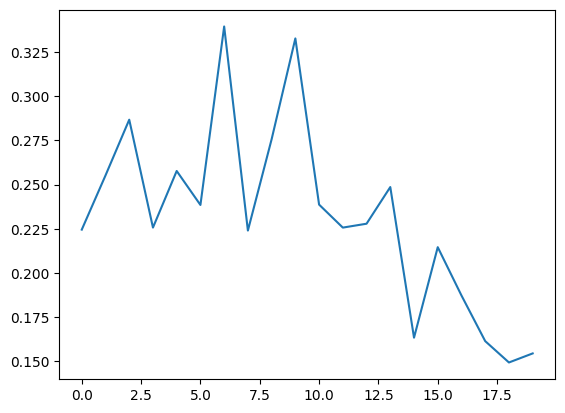

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])  # Menampilkan grafik loss pada data validasi dari hasil pelatihan model

In [ ]:
# You can also check the another metrics
history.history.keys() # Menampilkan daftar kunci yang tersedia dalam dictionary history.history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

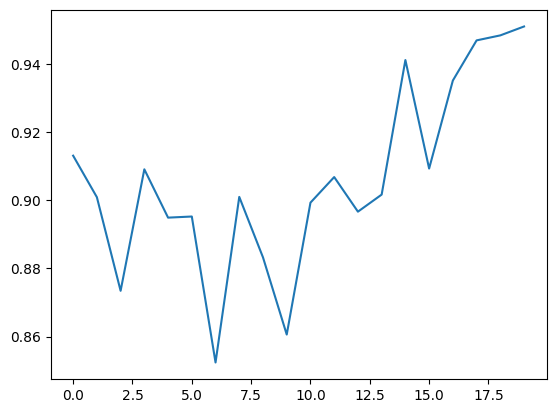

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy']) # Menampilkan grafik akurasi pada data validasi dari hasil pelatihan model

# Save The Model

In [ ]:
# The result will show in colab directory
network.save('network', save_format= 'h5') # Menyimpan model neural network ke dalam file dengan format h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [ ]:
# Import library
from tensorflow.keras.models import load_model # Digunakan untuk membantu dalam memuat model yang telah disimpan

In [ ]:
# Load saved network
load_network = load_model('network') # Memuat model dengan nama atapun path network yang sudah disimpan sebelumnya dan disimpan dalam load_network

In [ ]:
# Check summary
load_network.summary() # Menampilkan rincian model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

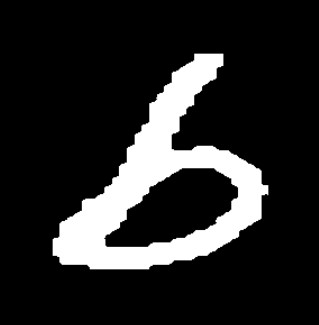

In [ ]:
# Load Image
import cv2 # Mengimpor library OpenCV untuk pemrosesan gambar
from google.colab.patches import cv2_imshow # Mengimpor cv2_imshow dari Google Colab untuk menampilkan gambar di notebook

img = cv2.imread('/content/b_small.jpg') # Membaca gambar 'b_small.jpg' dan menyimpannya dalam variabel 'img'
cv2_imshow(img) # Menampilkan gambar menggunakan cv2_imshow

In [ ]:
# Check shape
img.shape # Mengembalikan dimensi dari gambar yang telah dibaca

(325, 319, 3)

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Mengonversi gambar menjadi skala abu-abu (grayscale)

# check shape
gray_img.shape # Menampilkan dimensi dari gambar dalam skala abu-abu

(325, 319)

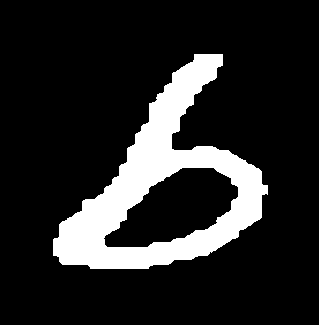

125.0


In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Melakukan thresholding pada gambar skala abu-abu menggunakan metode Otsu

cv2_imshow(thresh) # Menampilkan gambar hasil thresholding menggunakan cv2_imshow

# print threshold value
print(value) # Mencetak nilai threshold yang dihitung menggunakan metode Otsu

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28)) # Merubah ukuran pixel citra menjadi 28 x 28
cv2_imshow(img_resize) # Menampilkan gambar yang telah diresize menggunakan cv2_imshow

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # Melakukan normalisasi pada gambar yang telah diresize
img_input = np.expand_dims(img_input, axis=-1) # Menambahkan dimensi kedalaman pada gambar

# check shape
img_input.shape # Menampilkan dimensi dari gambar yang siap sebagai input untuk model

(28, 28, 1)

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1)) # Mengubah bentuk array gambar menjadi (1, 28, 28, 1) yang sesuai dengan format input model
img_input.shape # Menampilkan dimensi dari gambar yang telah diubah bentuknya menjadi input model

(1, 28, 28, 1)

In [ ]:
# Make a predition
prediction = load_network.predict(img_input) # Melakukan prediksi terhadap gambar yang telah diubah menjadi format yang sesuai untuk model
pred_label = np.argmax(prediction) # Menggunakan np.argmax() untuk mendapatkan label prediksi aktual
pred_label # Menampilkan label prediksi hasil dari gambar yang diuji

1/1 [==============================] - 0s 376ms/step


6

In [ ]:
# check label for 6
name_labels[6] # menampilkan value

'6'

# Kesimpulan
Hasil yang diperoleh setelah melatih model dengan menggunakan CNN, pada testing on real image hasinya masih salah, real image menunjukkan huruf b kecil, namun di prediksi menunjukkan angka 6. hal ini bisa terjadi karena gambar b kecil pada gambar dan angka 6 terlihat tidak jauh berbeda. sehingga model membuat prediksi dengan menampilkan value 6.